In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [35]:
#creating dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#here loc is used to set mean,scale is standard deviation
outliers=np.array([10,11,20,120,150,80])
data=np.concatenate([data,outliers])#adding outliers to the dataset


In [36]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [37]:
df.tail()

,Values
101,11.0
102,20.0
103,120.0
104,150.0
105,80.0


***using scatter plot finding outliers***

**<ins>A scatter plot helps visually identify extreme values.</ins>**

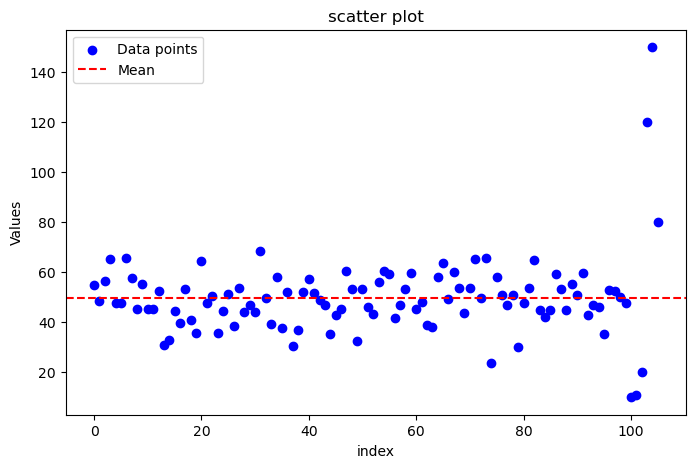

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel('index')
plt.ylabel('Values')
plt.title("scatter plot")
plt.legend()
plt.show()

***using box plot***

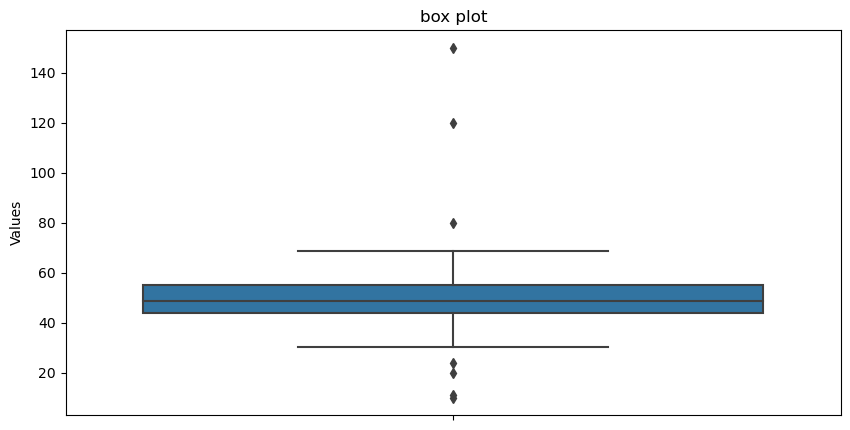

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,y='Values')
plt.title('box plot')
plt.show()

***z-score method**

**z=(data point-mean)/standard deviation***

***<ins>if z>3 or z<-3 then it is outlier</ins>***

In [39]:
df['z-score']=zscore(df['Values'])
df['Outliers']=df['z-score'].apply(lambda x:'Outlier' if (x>3 or x<-3) else 'Normal')
df[df['Outliers']=='Outlier']

,Values,z-score,Outliers
103,120.0,4.307319,Outlier
104,150.0,6.150122,Outlier


***<ins>iqr</ins>***

***iqr=q3-q1***

***cal q1 (25TH PERcentile) and q3(75th percentile)***

***compute iqr***

***lower bound&upper bound***

  ***lower bound=q1-1.5*iqr****
    
  ***upper bound=q3+1.5*iqr***

***any value outside this range is outlier***


In [40]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
iqr=Q3-Q1
lower=Q1-1.5*iqr
upper=Q3+1.5*iqr
df['outlier_iqr']=df['Values'].apply(lambda x:'Outlier' if(x<lower or x>upper)else 'Normal')
df[df['outlier_iqr']=='Outlier']

,Values,z-score,Outliers,outlier_iqr
74,23.802549,-1.601780,Normal,Outlier
100,10.000000,-2.449626,Normal,Outlier
101,11.000000,-2.388200,Normal,Outlier
102,20.000000,-1.835359,Normal,Outlier
103,120.000000,4.307319,Outlier,Outlier
104,150.000000,6.150122,Outlier,Outlier
105,80.000000,1.850248,Normal,Outlier


***IQR WITH 5-NUMBER SUMMARY***

***IN THIS WE WILL FIND MIN VALUE in the dataset-Q0***

***First quartile(Q1)-25th percentile(lower quantile)***

***median(Q2)-THE 50th percentile(middle value)***

***third quantile(Q3)-75th percentile(upper quantile)***

***max (Q4)-the largest value in the dataset***



In [56]:
q1=np.percentile(data,25)
q2=np.median(data)
q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)
iqr=q1-q3
low=q1-1.5*iqr
upp=q3+1.5*iqr
outliers=data[(data<low)|(data>upp)]
num_outliers = outliers.shape[0]  # Count of outliers

In [58]:
print(f"5-number summmary:\nMin: {min_value},Q1:{q1},Median(Q2): {q2},Q3:{q3},Max:{max_value}")
print(f"iqr:{iqr}")
print(f"lower bound:{low},upper bound:{upp}")
print(f"outliers:{outliers}")
print(f"Number of Outliers: {num_outliers}")

5-number summmary:
Min: 10.0,Q1:43.657335309888076,Median(Q2): 48.73043708220287,Q3:55.09129113087825,Max:150.0
iqr:-11.433955820990171
lower bound:60.808269041373336,upper bound:37.940357399392994
outliers:[ 54.96714153  48.61735699  56.47688538  65.23029856  47.65846625
  47.65863043  65.79212816  57.67434729  45.30525614  55.42560044
  45.36582307  45.34270246  52.41962272  30.86719755  32.75082167
  44.37712471  39.8716888   53.14247333  40.91975924  35.87696299
  64.65648769  47.742237    50.67528205  35.75251814  44.55617275
  51.1092259   38.49006423  53.75698018  43.9936131   47.0830625
  43.98293388  68.52278185  49.86502775  39.42289071  58.22544912
  37.7915635   52.08863595  30.40329876  36.71813951  51.96861236
  57.3846658   51.71368281  48.84351718  46.98896304  35.2147801
  42.80155792  45.39361229  60.57122226  53.4361829   32.36959845
  53.24083969  46.1491772   43.23078     56.11676289  60.30999522
  59.31280119  41.60782477  46.90787624  53.31263431  59.75545127
  4